In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Dispersion relation
R_dim = 30e3
R_nondim = R_dim/300e3
beta_dim = 2e-12
beta_nondim = beta_dim * 86400 * 300e3

#Fourier harmonics
S = 10 #spectral radius
N = 41

def omega(k,l):
    return -beta_nondim * k / (k**2 + l**2 + R_nondim**-2)

def A(k,l):
  return 1

In [ ]:
x,y = 1,1
np.real(np.sum(1j*K*0.001*np.exp(1j*(K*x + L*y - omega_vals*t + phi))))

In [ ]:
from scipy.interpolate import RegularGridInterpolator

k,l = np.linspace(-S,S,N),np.linspace(-S,S,N)
K,L = np.meshgrid(k,l)
phi = np.random.uniform(0,2*np.pi,size=(N,N))

def modulo_grid(x, y):
  x_mod = np.mod(x + np.pi, 2 * np.pi) - np.pi
  y_mod = np.mod(y + np.pi, 2 * np.pi) - np.pi
  return x_mod, y_mod





In [ ]:
P = 1000 #number of gridpoints in physical space
omega_vals = omega(K,L)
t = 30
X,Y = np.linspace(-np.pi,np.pi,P),np.linspace(-np.pi,np.pi,P)
U,V = np.empty((P,P)),np.empty((P,P))
for i,x in enumerate(X):
  for j,y in enumerate(Y):
    U[i,j] = np.real(np.sum(1j*K*0.005*np.exp(1j*(K*x + L*y - omega_vals*t + phi))))
    V[i,j] = np.real(np.sum(1j*L*0.005*np.exp(1j*(K*x + L*y - omega_vals*t + phi))))

In [ ]:
u_interp = RegularGridInterpolator((X, Y), U)
v_interp = RegularGridInterpolator((X, Y), V)

def f(t,pos):
  #Interpolate value from U,V.
  x_mod, y_mod = modulo_grid(*pos)
  dx = u_interp([x_mod, y_mod])[0]
  dy = v_interp([x_mod, y_mod])[0]
  return np.array([dx,dy])

U

array([[-0.80981475, -0.78235052, -0.75331626, ..., -0.35353254,
        -0.33015404, -0.30724775],
       [-0.86178745, -0.83399722, -0.80464978, ..., -0.38196783,
        -0.35996577, -0.33835257],
       [-0.91214562, -0.88416168, -0.8546387 , ..., -0.40913559,
        -0.38861105, -0.36839138],
       ...,
       [-0.83228731, -0.80269915, -0.77376037, ..., -0.50078436,
        -0.51719864, -0.53438616],
       [-0.84469327, -0.81616192, -0.78828432, ..., -0.50801429,
        -0.52609855, -0.54503065],
       [-0.85434115, -0.82690421, -0.80012394, ..., -0.5124061 ,
        -0.53214959, -0.55281423]])

In [ ]:
t = 30
x,y = 0.5,0.5
true = np.real(np.sum(1j*K*1*np.exp(1j*(K*x + L*y - omega_vals*t + phi))))
approx = u_interp([x,y])
print(true-approx)

[44.5894266]


In [ ]:
from scipy.integrate import solve_ivp

t_span = (0,10000)
y0 = [2,1]
sol = solve_ivp(f,t_span,y0)

path = sol.y




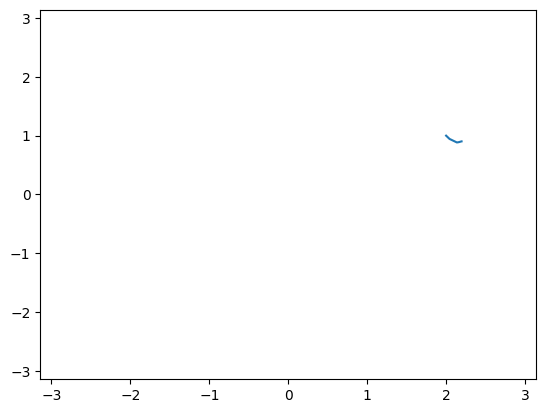

In [ ]:
plt.plot(path[0],path[1])
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

plt.show()

In [ ]:
def rk4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(t[i], y[i])
        test1 = y[i] + 0.5*h*k1
        test2 = t[i] + 0.5*h

        k2 = f(t[i] + 0.5*h, y[i] + 0.5*h*k1)
        k3 = f(t[i] + 0.5*h, y[i] + 0.5*h*k2)
        k4 = f(t[i+1], y[i] + h*k3)
        y[i+1] = y[i] + (h/6)*(k1 + 2*k2 + 2*k3 + k4)
    return y

y0 = [1,1]
t = np.arange(0, 15000, 0.5)
trajectory = rk4(f, y0, t)  

In [ ]:
trajectory


array([[ 1.00000000e+00,  1.00000000e+00],
       [-8.29690860e+01,  2.10601098e+01],
       [-1.85018285e+01, -5.57289394e+00],
       ...,
       [ 1.82955262e+04, -9.43550142e+03],
       [ 1.83237843e+04, -9.40965352e+03],
       [ 1.83256077e+04, -9.38735037e+03]])

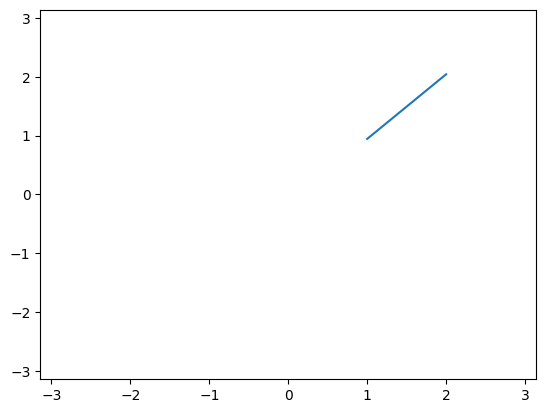

In [ ]:
plt.plot(path[:,0],path[:,1])
plt.xlim(-np.pi, np.pi)
plt.ylim(-np.pi, np.pi)

plt.show()